In [1]:
import scanpy as sc
import pandas as pd

In [ ]:
ad = sc.read_h5ad("/SGRNJ06/randd/USER/cjj/celedev/XZMU/20230220subsetTharmony/P22030204_230112_homo_PBMC.diff_PRO.h5ad")

In [ ]:
ad.obs

In [ ]:
DYC0 = pd.read_csv('/SGRNJ06/randd/USER/cjj/celedev/XZMU/20230220subsetTharmony/DYC-0-X1CJ_filtered_UMI.csv')
DYC1 = pd.read_csv('/SGRNJ06/randd/USER/cjj/celedev/XZMU/20230220subsetTharmony/DYC-1-X1CJ_filtered_UMI.csv')
DYC2 = pd.read_csv('/SGRNJ06/randd/USER/cjj/celedev/XZMU/20230220subsetTharmony/DYC-2-X1CJ_filtered_UMI.csv')
WYP0 = pd.read_csv('/SGRNJ06/randd/USER/cjj/celedev/XZMU/20230220subsetTharmony/WYP-0-X2CJ_filtered_UMI.csv')
WYP1 = pd.read_csv('/SGRNJ06/randd/USER/cjj/celedev/XZMU/20230220subsetTharmony/WYP-1-X1CJ_filtered_UMI.csv')
WYP2 = pd.read_csv('/SGRNJ06/randd/USER/cjj/celedev/XZMU/20230220subsetTharmony/WYP-2-X2CJ_filtered_UMI.csv')
GC0 = pd.read_csv('/SGRNJ06/randd/USER/cjj/celedev/XZMU/20230220subsetTharmony/220309010_404_FJ_filtered_UMI.csv')
GC1 = pd.read_csv('/SGRNJ06/randd/USER/cjj/celedev/XZMU/20230220subsetTharmony/220303012CD_FJ_filtered_UMI.csv')
GC2 = pd.read_csv('/SGRNJ06/randd/USER/cjj/celedev/XZMU/20230220subsetTharmony/220305023ABC_FJ_filtered_UMI.csv')

In [ ]:
DYC0.barcode = DYC0.barcode.apply(lambda x: f"DYC0_{x}")
DYC0_cells = list(DYC0[DYC0["sum_UMI"]!=0].barcode)
DYC1.barcode = DYC1.barcode.apply(lambda x: f"DYC1_{x}")
DYC1_cells = list(DYC1[DYC1["sum_UMI"]!=0].barcode)
DYC2.barcode = DYC2.barcode.apply(lambda x: f"DYC2_{x}")
DYC2_cells = list(DYC2[DYC2["sum_UMI"]!=0].barcode)

WYP0.barcode = WYP0.barcode.apply(lambda x: f"WYP0_{x}")
WYP0_cells = list(WYP0[WYP0["sum_UMI"]!=0].barcode)
WYP1.barcode = WYP1.barcode.apply(lambda x: f"WYP1_{x}")
WYP1_cells = list(WYP1[WYP1["sum_UMI"]!=0].barcode)
WYP2.barcode = WYP2.barcode.apply(lambda x: f"WYP2_{x}")
WYP2_cells = list(WYP2[WYP2["sum_UMI"]!=0].barcode)

GC0.barcode = GC0.barcode.apply(lambda x: f"GC0_{x}")
GC0_cells = list(GC0[GC0["sum_UMI"]!=0].barcode)
GC1.barcode = GC1.barcode.apply(lambda x: f"GC1_{x}")
GC1_cells = list(GC1[GC1["sum_UMI"]!=0].barcode)
GC2.barcode = GC2.barcode.apply(lambda x: f"GC2_{x}")
GC2_cells = list(GC2[GC2["sum_UMI"]!=0].barcode)

In [ ]:
cells = (DYC0_cells+DYC1_cells+DYC2_cells+WYP0_cells+WYP1_cells+WYP2_cells+GC0_cells+GC1_cells+GC2_cells)

In [ ]:
ad.obs.gname = "car_neg"

In [ ]:
ad.obs.loc[ad.obs.index.isin(cells), 'gname'] = 'car_pos'

In [ ]:
ad.obs.value_counts("gname")

In [ ]:
ad.obs

In [ ]:
ad.write("/SGRNJ06/randd/USER/cjj/celedev/XZMU/20230220subsetTharmony/rename.h5ad")

In [ ]:
ad

In [ ]:
a = ad.obs[ad.obs["cluster"]=="TCells"]

In [ ]:
a.value_counts("gname")

In [167]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [150]:
h5ad = ("/SGRNJ06/randd/USER/cjj/celedev/rna/20230301/M_0201SC_liver_SL_2_lib/06.analysis//M_0201SC_liver_SL_2_lib.h5ad")

In [151]:
contig_file =("/SGRNJ06/randd/PROJECT/RD20073101_ScRNA_VDJ/2022_cm/20230227SCSN/SC_TCR1/M_0201SC_liver_SL_2_T3lib/05.match/matched_contig_annotations.csv")

In [152]:
        contig_file = pd.read_csv(contig_file)
        assembled_cells = set(contig_file.barcode)

In [153]:
        h5ad = sc.read_h5ad(h5ad)

In [154]:
h5ad.obs['status'] = 'None'

In [155]:
h5ad.obs

,n_genes_by_counts,total_counts,total_counts_mito,pct_counts_mito,cluster,status
AACACACAGAACGCTAGTAGAGAATGG,559,827.0,29.0,3.506650,0,None
AACACACAGAACGCTAGTGAAGCCATT,664,1100.0,18.0,1.636364,3,None
AACACACAGAACGCTAGTGTAAGATCG,1512,3208.0,51.0,1.589776,20,None
AACACACAGAACGTCCAACCATCCTAA,459,811.0,54.0,6.658446,8,None
AACACACAGAACGTCCAAGTAAGATCG,604,948.0,28.0,2.953587,22,None
...,...,...,...,...,...,...
TGTGGACACTTGCCGTCACAGACACTC,628,982.0,26.0,2.647658,25,None
TGTGGACACTTGGTGACCACGCCACTT,429,820.0,276.0,33.658539,5,None
TGTGGACACTTGGTGACCGGCCATGTT,455,660.0,30.0,4.545455,14,None
TGTGGACACTTGGTGACCTACGCGTAC,660,1079.0,41.0,3.799815,0,None


In [156]:
h5ad.obs.loc[h5ad.obs.index.isin(assembled_cells), "status"] = "T/BCR"

In [157]:
h5ad.obs

,n_genes_by_counts,total_counts,total_counts_mito,pct_counts_mito,cluster,status
AACACACAGAACGCTAGTAGAGAATGG,559,827.0,29.0,3.506650,0,None
AACACACAGAACGCTAGTGAAGCCATT,664,1100.0,18.0,1.636364,3,None
AACACACAGAACGCTAGTGTAAGATCG,1512,3208.0,51.0,1.589776,20,None
AACACACAGAACGTCCAACCATCCTAA,459,811.0,54.0,6.658446,8,None
AACACACAGAACGTCCAAGTAAGATCG,604,948.0,28.0,2.953587,22,None
...,...,...,...,...,...,...
TGTGGACACTTGCCGTCACAGACACTC,628,982.0,26.0,2.647658,25,None
TGTGGACACTTGGTGACCACGCCACTT,429,820.0,276.0,33.658539,5,None
TGTGGACACTTGGTGACCGGCCATGTT,455,660.0,30.0,4.545455,14,None
TGTGGACACTTGGTGACCTACGCGTAC,660,1079.0,41.0,3.799815,0,None


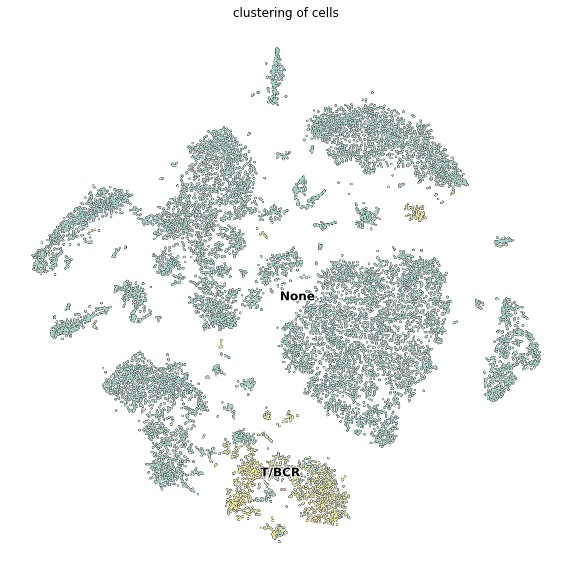

In [181]:
with plt.rc_context({'figure.figsize': (10, 10)}):
    sc.pl.tsne(h5ad, color='status', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette='Set3')

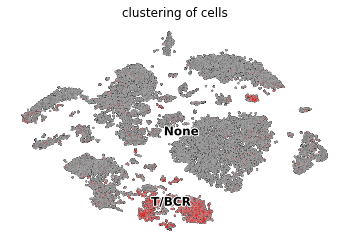

In [189]:
    sc.pl.tsne(h5ad, color='status', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette=['C7','C3'])


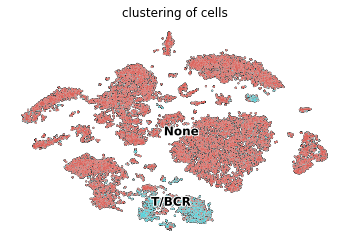

In [178]:
    sc.pl.tsne(h5ad, color='status', add_outline=True, legend_loc='on data',
               legend_fontsize=12, legend_fontoutline=2,frameon=False,
               title='clustering of cells', palette=sns.color_palette("hls", 2))

In [161]:
from matplotlib.colors import ListedColormap, BoundaryNorm